In [1]:
import pandas as pd

house_df =  pd.read_csv('HousingData.csv')

print("Data shape: ", house_df.shape)
house_df.isnull().values.any()
house_df.describe()

Data shape:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data analysis and preprocessing

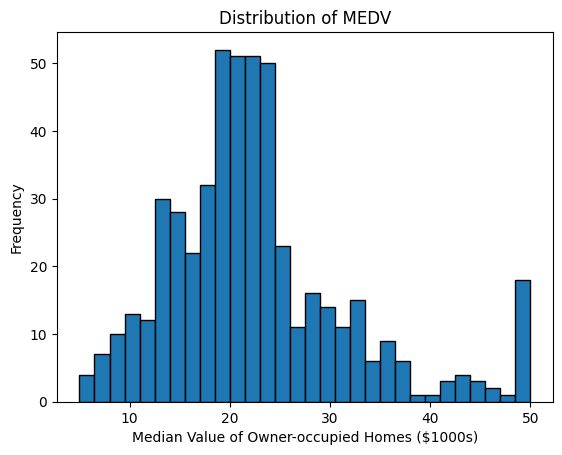

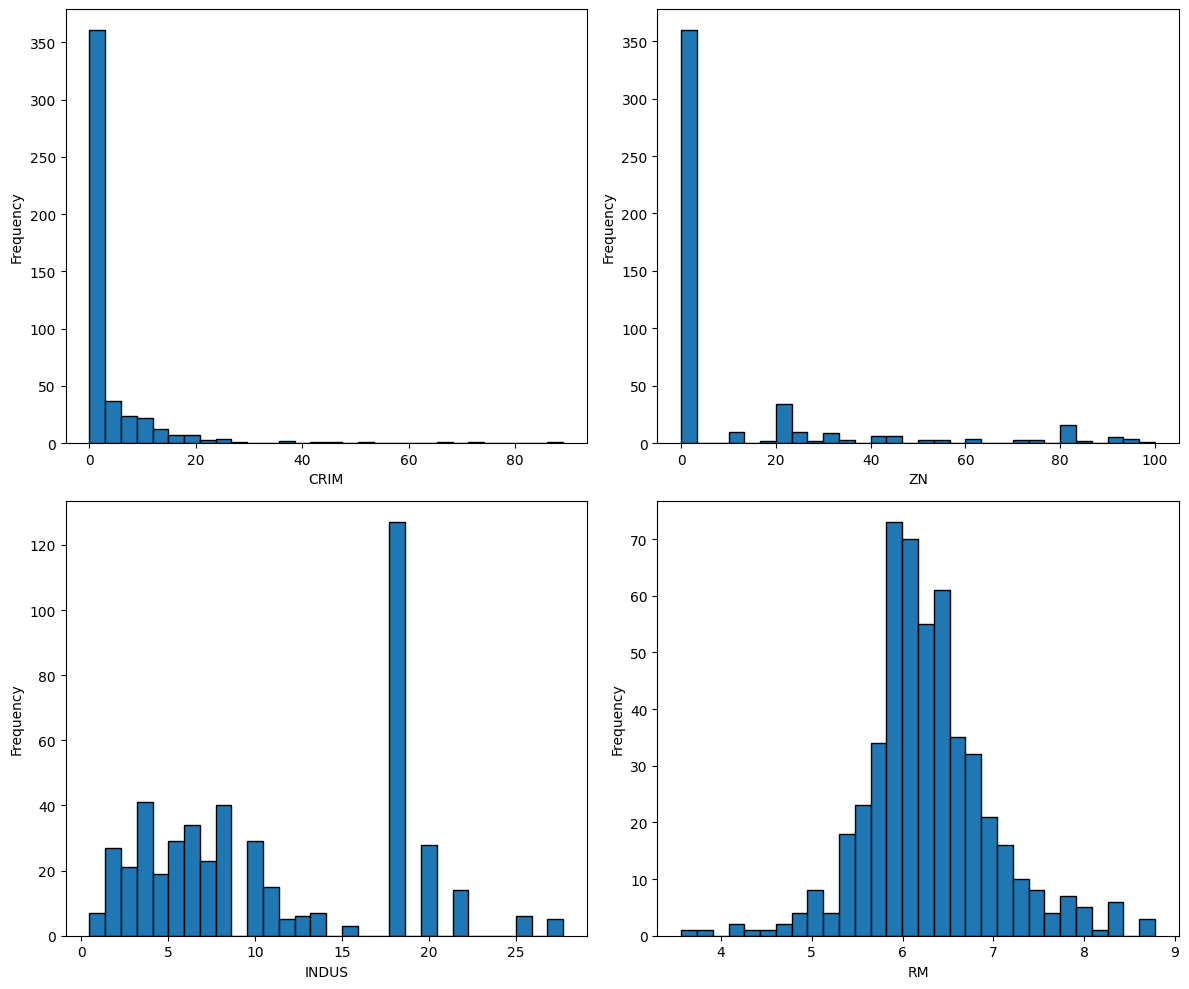

In [2]:
import matplotlib.pyplot as plt

plt.hist(house_df['MEDV'], bins=30, edgecolor='k')
plt.xlabel('Median Value of Owner-occupied Homes ($1000s)')
plt.ylabel('Frequency')
plt.title('Distribution of MEDV')
plt.show()

selected_features = ['CRIM', 'ZN', 'INDUS', 'RM']

# Create histograms for selected features
plt.figure(figsize=(12, 10))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    plt.hist(house_df[feature], bins=30, edgecolor='k')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

y = house_df['MEDV']
X = house_df.drop(columns=['MEDV'])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.7, random_state=42)
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_val_df = pd.DataFrame(X_val, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

print("Missing values in X_train_df:", X_train_df.isnull().values.any())
print("Missing values in X_val_df:", X_val_df.isnull().values.any())
print("Missing values in X_test_df:", X_test_df.isnull().values.any())


Missing values in X_train_df: False
Missing values in X_val_df: False
Missing values in X_test_df: False


## Multi Layer Perceptron Regresson Implementation from Scratch

In [5]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def sgd_optimizer(weights, gradients, learning_rate, batch_size=None):
    for i in range(len(weights)):
        weights[i] -= learning_rate * gradients[i]

def batch_gradient_descent(weights, gradients, learning_rate, batch_size=None):
    for i in range(len(weights)):
        weights[i] -= learning_rate * gradients[i]

def mini_batch_gradient_descent(weights, gradients, learning_rate, batch_size):
    for i in range(len(weights)):
        weights[i] -= learning_rate * gradients[i]

class MLP_Regressor:
    def __init__(self, input_size, hidden_layers, output_size, learning_rate=0.01, activation='sigmoid', optimizer='sgd'):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        if activation == 'sigmoid':
            self.activation_function = sigmoid
        elif activation == 'tanh':
            self.activation_function = tanh
        elif activation == 'relu':
            self.activation_function = relu
        
        if optimizer == 'sgd':
            self.optimizer = sgd_optimizer
        elif optimizer == 'batch':
            self.optimizer = batch_gradient_descent
        elif optimizer == 'mini-batch':
            self.optimizer = mini_batch_gradient_descent
        
        self.weights, self.biases = self.initialize_weights_and_biases()
    
    def initialize_weights_and_biases(self):
        layer_sizes = [self.input_size] + self.hidden_layers + [self.output_size]
        weights = [np.random.randn(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes) - 1)]
        biases = [np.zeros(layer_size) for layer_size in layer_sizes[1:]]
        return weights, biases
    
    def forward_propagation(self, x):
        activations = [x]
        weighted_inputs = []
        
        for i in range(len(self.weights)):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            weighted_inputs.append(z)
            a = self.activation_function(z)
            activations.append(a)
        return activations, weighted_inputs
    
    def backward_propagation(self, x, y, activations, weighted_inputs):
        m = x.shape[0]
        gradients = [np.zeros_like(weight) for weight in self.weights]
        bias_gradients = [np.zeros_like(bias) for bias in self.biases]
        
        delta = None
        if self.activation_function == sigmoid:
            delta = (activations[-1] - y) * activations[-1] * (1 - activations[-1])
        elif self.activation_function == tanh:
            delta = (activations[-1] - y) * (1 - np.tanh(activations[-1]) ** 2)
        elif self.activation_function == relu:
            delta = (activations[-1] - y) * (activations[-1] > 0).astype(float)

        for i in range(len(self.weights) - 1, -1, -1):
            if self.activation_function == sigmoid:
                activation_derivative = activations[i] * (1 - activations[i])
            elif self.activation_function == tanh:
                if(i > 0):
                    activation_derivative = 1 - np.tanh(weighted_inputs[i-1]) ** 2
            elif self.activation_function == relu:
                activation_derivative = (activations[i] > 0).astype(float)
            
            gradients[i] = np.dot(activations[i].T, delta) / m
            bias_gradients[i] = np.sum(delta, axis=0) / m
            if(i == 0):
                continue
            delta = np.dot(delta, self.weights[i].T) * activation_derivative

        self.biases = [bias - self.learning_rate * bias_gradient for bias, bias_gradient in zip(self.biases, bias_gradients)]
        return gradients
    
    def train(self, x_train, y_train, epochs, batch_size=None):
        train_losses = []
        valid_losses = []
        for epoch in range(epochs):  
            self.n_samples = x_train.shape[0]
            shuffle = np.random.permutation(self.n_samples)
            train_loss = 0
            valid_loss = 0
            if batch_size is not None:
                X_batches = np.array_split(x_train[shuffle], len(x_train) // batch_size)
                Y_batches = np.array_split(y_train[shuffle].to_numpy().reshape(-1, 1), len(y_train) // batch_size)  # Reshape y
            else:
                X_batches = [x_train[shuffle]]
                Y_batches = [y_train[shuffle].to_numpy().reshape(-1, 1)] 

            for batch_x, batch_y in zip(X_batches, Y_batches):
                activations, weighted_inputs = self.forward_propagation(batch_x) 
                train_loss += np.mean((activations[-1] - batch_y) ** 2)
                valid_loss += self.calc_loss(self.X_val, self.y_val.to_numpy().reshape(-1, 1))
                gradients = self.backward_propagation(batch_x, batch_y, activations, weighted_inputs)
                self.optimizer(self.weights, gradients, self.learning_rate, batch_size)

            train_loss = (train_loss / len(X_batches))
            valid_loss = (valid_loss / len(X_batches))
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)
        self.train_lossarr = train_losses  
        self.valid_lossarr = valid_losses 
    
    def predict(self, x):
        activations, _ = self.forward_propagation(x)
        predictions = activations[-1]
        return predictions

    def calc_loss(self, x, y):
        activations, _ = self.forward_propagation(x)
        loss = np.mean((activations[-1] - y) ** 2)
        return loss


In [6]:
import wandb
wandb.login(key='fac5cd7f576f5d6d2591b0e77385c09a7922b210')
wandb.init(
    # set the wandb project where this run will be logged
    project="SMAI_ASSIGNMENT3_Part3",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.005,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 200,
    }
)

model = MLP_Regressor(input_size=13, hidden_layers=[32, 16], output_size=1, learning_rate=0.005, activation='relu', optimizer='mini-batch')
model.X_val = X_val
model.y_val = y_val
model.train(X_train, y_train, epochs=200, batch_size=20)
valid_lossarr = model.valid_lossarr
for epoch, loss in enumerate(valid_lossarr, start=1):
    wandb.log({"Validation Loss": loss}, step=epoch)
wandb.finish()


/Users/swayam/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
/Users/swayam/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
wandb: Currently logged in as: swayamagrawal1004. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command l

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Validation Loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Loss,17.09818


In [7]:
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score

learning_rates = [0.01, 0.007, 0.003]
epochs = [50, 100, 200]
hidden_neurons = [[32, 16], [6, 6], [8, 6], [6, 6, 6], [8, 6, 6]]
activations = ['sigmoid', 'tanh', 'relu']
optimizers = ['sgd', 'batch', 'mini-batch']

best_mse = 1e9
best_params_mse = None
best_mse_r2 = None
best_mse_rmse = None

for activation in activations:
    for optimizer in optimizers:
        for epoch in epochs:
            for learning_rate in learning_rates:
                for hn in hidden_neurons:
                    model = MLP_Regressor(input_size=13, hidden_layers=hn, output_size=1, learning_rate=learning_rate, activation=activation, optimizer=optimizer)
                    model.X_val = X_val
                    model.y_val = y_val 
                    
                    if optimizer != 'mini-batch':
                        model.train(X_train, y_train, epochs=epoch, batch_size=None)
                    else:
                        model.train(X_train, y_train, epochs=epoch, batch_size=20)

                    y_pred = model.predict(X_val)
                    mse = mean_squared_error(y_val, y_pred)
                    rmse = np.sqrt(mse)
                    r2 = r2_score(y_val, y_pred)

                    params = {'Activation': activation, 'Optimizer': optimizer, 'Epochs': epoch, 'Learning Rate': learning_rate, 'Hidden Neurons': hn}

                    if mse < best_mse:
                        best_params_mse = params
                        best_mse = mse
                        best_mse_r2 = r2
                        best_mse_rmse = rmse

print("Best params according to MSE: ")
print(best_params_mse)
print("MSE: " + str(best_mse))
print("RMSE: " + str(best_mse_rmse))
print("R2 Score: " + str(best_mse_r2))

Best params according to MSE: 
{'Activation': 'relu', 'Optimizer': 'mini-batch', 'Epochs': 200, 'Learning Rate': 0.003, 'Hidden Neurons': [8, 6, 6]}
MSE: 11.274837811541172
RMSE: 3.3578025271807115
R2 Score: 0.8761805364057562


In [15]:
activation = best_params_mse['Activation']
optimizer = best_params_mse['Optimizer']
epoch = best_params_mse['Epochs']
learning_rate = best_params_mse['Learning Rate']
hn = best_params_mse['Hidden Neurons']

model = MLP_Regressor(input_size=13, hidden_layers=hn, output_size=1, learning_rate=learning_rate, activation=activation, optimizer='sgd')
model.X_val = X_val
model.y_val = y_val
if optimizer != 'mini-batch':
    model.train(X_train, y_train, epochs=epoch, batch_size=None)
else:
    model.train(X_train, y_train, epochs=epoch, batch_size=20)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE for test data: " + str(mse))
print("RMSE for test data: " + str(rmse))
print("R2 Score for test data: " + str(r2))

MSE for test data: 23.73119968058816
RMSE for test data: 4.871467918460324
R2 Score for test data: 0.715527563334128
